# ToDos
- Anzahl der Artikel innerhalb jeder Kategorie untersuchen
  - Auch innerhalb jedes Attributes

In [133]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import neighbors
from sklearn import svm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from graphviz import Source

In [134]:
df = pd.read_excel("..\data\Returns_Export.xlsx")

In [135]:
df.head()

,redatum,artikelbeschreibung,verkaufspreis,platformspecificorderid,VK,Erstattungstyp,Erstattungsart,Artikelpreis inkl Versand,User_Id,Vendor_Id,Asin,Category,client_condition_user_id,Condition,Item_State,Accessory_Complete,OVP,Repaired,Case_Swap,Seal_Sticker_Damaged
0,2021-12-14,Baby Wasserspielzeug Addmos Badespielzeug Spie...,9.99,07-08009-64134,Verkauf,0,0,9.99,265.0,23.0,B083DQH3DY,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
1,2021-05-13,Pokemon Sun & Moon Theme Deck Pack Waldschatte...,9.99,16-07049-22699,Verkauf,0,0,9.99,265.0,23.0,B01MZ6A8YO,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
2,2021-09-20,Spielpuppe Enchantimals GNP16 Schneemann Sharl...,9.99,19-07627-72302,Verkauf,0,0,9.99,265.0,23.0,B084L11FCZ,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
3,2021-04-15,Schlagzeug Colorbaby Spielzeug Kinder Musik In...,9.99,17-06905-72218,Verkauf,0,0,9.99,265.0,23.0,B07X4ZGCPQ,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
4,2021-06-14,Ravensburger tiptoi 00737 Schatzsuche in der B...,9.99,08-07202-18906,Verkauf,0,0,9.99,265.0,23.0,B00V8KE8N6,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183257 entries, 0 to 183256
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   redatum                    183257 non-null  datetime64[ns]
 1   artikelbeschreibung        183257 non-null  object        
 2   verkaufspreis              183257 non-null  float64       
 3   platformspecificorderid    183257 non-null  object        
 4   VK                         183257 non-null  object        
 5   Erstattungstyp             183243 non-null  object        
 6   Erstattungsart             183243 non-null  object        
 7   Artikelpreis inkl Versand  183257 non-null  float64       
 8   User_Id                    178475 non-null  float64       
 9   Vendor_Id                  178474 non-null  float64       
 10  Asin                       177029 non-null  object        
 11  Category                   178475 non-null  object  

In [137]:
df.describe

<bound method NDFrame.describe of           redatum                                artikelbeschreibung  \
0      2021-12-14  Baby Wasserspielzeug Addmos Badespielzeug Spie...   
1      2021-05-13  Pokemon Sun & Moon Theme Deck Pack Waldschatte...   
2      2021-09-20  Spielpuppe Enchantimals GNP16 Schneemann Sharl...   
3      2021-04-15  Schlagzeug Colorbaby Spielzeug Kinder Musik In...   
4      2021-06-14  Ravensburger tiptoi 00737 Schatzsuche in der B...   
...           ...                                                ...   
183252 2021-10-25  Druckerpapier Kopierpapier A4 80g/m² weiß, all...   
183253 2021-10-25  Druckerpapier Kopierpapier A4 80g/m² weiß, all...   
183254 2021-10-26  Druckerpapier Kopierpapier A4 80g/m² weiß, all...   
183255 2021-10-28  Druckerpapier Kopierpapier A4 80g/m² weiß, all...   
183256 2021-10-29  Druckerpapier Kopierpapier A4 80g/m² weiß, all...   

        verkaufspreis platformspecificorderid       VK Erstattungstyp  \
0                9.99       

In [138]:
refunds = df.loc[(df["Erstattungsart"] != 0) & (df["Erstattungsart"] != "NaN")]
all_pos = df
all_pos["Erstattungstyp"].replace(0, "Verkauf", inplace=True)

In [139]:
refunds.head()

,redatum,artikelbeschreibung,verkaufspreis,platformspecificorderid,VK,Erstattungstyp,Erstattungsart,Artikelpreis inkl Versand,User_Id,Vendor_Id,Asin,Category,client_condition_user_id,Condition,Item_State,Accessory_Complete,OVP,Repaired,Case_Swap,Seal_Sticker_Damaged
134534,2021-08-25,RockJam E-Gitarren-Set in Standardgröße E-Gita...,35.50,05-07518-23081,Verkauf,NaN,NaN,54.723077,226.0,23.0,B01M66OZ0V,MusicInstruments,226.0,Damage,Used,2.0,3.0,No,False,0.0
134535,2021-08-25,Akustikgitarre MSA Gitarre Instrument 4/4 Größ...,15.15,05-07518-23081,Verkauf,NaN,NaN,34.373077,314.0,23.0,B01N6C6PJ3,MusicInstruments,314.0,Acceptable,Used,0.0,0.0,No,False,0.0
134536,2021-08-25,E-Gitarre RockJam Gitarre Saiteninstrument Sun...,53.88,05-07518-23081,Verkauf,NaN,NaN,73.103077,314.0,23.0,B01M6ZH0AW,MusicInstruments,314.0,NonFunctional,Used,1.0,0.0,No,False,0.0
134537,2021-08-25,Akustikgitarre Gitarre Martin Smith Akustik In...,20.50,05-07518-23081,Verkauf,NaN,NaN,39.723077,314.0,23.0,B00UOUK4IE,MusicInstruments,314.0,Damage,Used,1.0,2.0,No,False,0.0
134538,2021-06-07,ReNr 441799 ReNr 439035 EGitarre Display4top R...,25.00,05-07133-60124,Verkauf,Teilerstattung (TE),Defekt,25.000000,314.0,23.0,B0863H39LF,MusicInstruments,314.0,VeryGood,Used,2.0,0.0,No,False,0.0


In [140]:
refunds.dropna(inplace=True)
all_pos.dropna(inplace=True)

c:\Development\Anwendungsfelder_Business_Analytics\.venv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [141]:
refunds.shape

(18817, 20)

In [142]:
refunds.head()

,redatum,artikelbeschreibung,verkaufspreis,platformspecificorderid,VK,Erstattungstyp,Erstattungsart,Artikelpreis inkl Versand,User_Id,Vendor_Id,Asin,Category,client_condition_user_id,Condition,Item_State,Accessory_Complete,OVP,Repaired,Case_Swap,Seal_Sticker_Damaged
134538,2021-06-07,ReNr 441799 ReNr 439035 EGitarre Display4top R...,25.0,05-07133-60124,Verkauf,Teilerstattung (TE),Defekt,25.0,314.0,23.0,B0863H39LF,MusicInstruments,314.0,VeryGood,Used,2.0,0.0,No,False,0.0
134540,2021-01-12,ReNr 396232 ReNr 390034 Gaming Headset Astro A...,125.9,18-06280-86579,Verkauf,Retoure (RS),Defekt,125.9,150.0,23.0,B07TTB3SR2,VideoGames,150.0,NonFunctional,Used,1.0,1.0,No,False,0.0
134547,2022-03-21,ReNr 535089 Sitzbank Stagg PBH-780 BK P V/BK K...,30.0,15-08390-32712,Verkauf,Teilerstattung (TE),Defekt,30.0,351.0,23.0,B0064UUYYM,MusicInstruments,351.0,LikeNew,Used,1.0,4.0,No,False,0.0
134550,2022-01-24,ReNr 522075 Controller Turtle Beach Recon Weiß...,0.0,27-08155-81914,Ersatz,Ersatz,Ersatz,0.0,324.0,23.0,B0977KM6S7,VideoGames,324.0,VeryGood,Used,1.0,1.0,No,False,0.0
134551,2022-03-29,ReNr 537473 Kohlendioxid Tester Innenraum Dete...,0.0,13-08435-16229,Ersatz,Ersatz,Ersatz,0.0,268.0,23.0,B08F2F756X,HomeImprovement,324.0,Damage,Used,1.0,2.0,No,False,0.0


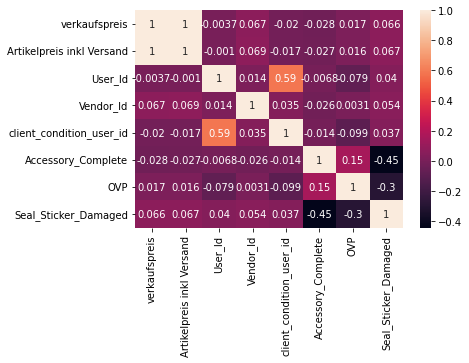

In [143]:
corrMatrix = refunds.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [144]:
print(refunds.Category.unique())
print(refunds.Category.nunique())
print(refunds.Category.value_counts())

['MusicInstruments' 'VideoGames' 'HomeImprovement' 'VideoGamesAccessories'
 'OfficeProduct' 'HomeEntertainment' 'ElectronicAccessories'
 'ComputerAccessories' 'Toy' 'PersonalComputer' 'Wireless'
 'HealthPersonalCare' 'Electronics' 'Drugstore' 'Beauty' 'AutoPart'
 'Tools' 'AutomotivePartsandAccessories' 'Jewelry' 'Luggage'
 'SportOutdoor' 'Watch' 'SchoolStationeryOfficeSupplies' 'CameraPhoto'
 'PetProducts' 'Music' 'VideoGamesConsoles' 'Clothing' 'PhoneAccessory'
 'Kitchen' 'Home' 'LawnPatioGarden' 'GiftCard' 'BabyProduct' 'Movies'
 'KitchenHousehold' 'SportingGoods' 'BuildingCenter' 'OutdoorLiving'
 'Navigation' 'BISS' 'SoundAndRecordingEquipment' 'Hobbies' 'Grocery'
 'Smartphones' 'Books' 'AutoAccessory' 'Tablets'
 'CommercialIndustrialScience' 'DigitalVideoGames' 'LargeAppliances'
 'Shoes' 'Furniture' 'Lighting' 'Video' 'PortableDevices' 'MobilePhones'
 'Software' 'MotorcyclePart']
59
VideoGames                        3333
MusicInstruments                  2769
Toy                   

In [145]:
print(refunds.Item_State.unique())
print(refunds.Item_State.value_counts())

['Used' 'New']
Used    16816
New      2001
Name: Item_State, dtype: int64


In [146]:
print(refunds.Accessory_Complete.unique())
print(refunds.Accessory_Complete.value_counts())

[2. 1. 0.]
1.0    14208
0.0     2344
2.0     2265
Name: Accessory_Complete, dtype: int64


In [147]:
print(refunds.OVP.unique())
print(refunds.OVP.value_counts())

[0. 1. 4. 2. 3.]
2.0    6411
0.0    4337
1.0    3949
3.0    2444
4.0    1676
Name: OVP, dtype: int64


In [148]:
print(refunds.Repaired.unique())
print(refunds.Repaired.value_counts())

['No' 'Yes' 'NotTried' 'ToRepair' 'Tried']
No          16025
Yes          1191
NotTried     1154
Tried         423
ToRepair       24
Name: Repaired, dtype: int64


In [149]:
print(refunds.Case_Swap.unique())
print(refunds.Case_Swap.value_counts())

[False]
False    18817
Name: Case_Swap, dtype: int64


In [150]:
print(refunds.Seal_Sticker_Damaged.unique())
print(refunds.Seal_Sticker_Damaged.value_counts())

[0. 1.]
0.0    17939
1.0      878
Name: Seal_Sticker_Damaged, dtype: int64


In [151]:
def exploratoryDataAnalysis(df):
    print(df.columns)
    print(df.shape)
    print(df.info())
    print(df.describe())
    print(df.head())
    print(df.tail())
    print(df.dtypes)
    print(df.isnull().sum())
    print(df.isnull().sum()/df.shape[0])
    print(df.isnull().sum()/df.shape[1])
    print(df.isnull().sum()/df.shape[0]/df.shape[1])
    print(df.isnull().sum()/df.shape[0]/df.shape[1]*100)
    print(df.isnull().sum()/df.shape[0]/df.shape[1]*100)

C:\Users\Daniel\AppData\Local\Temp/ipykernel_6056/2394358338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["Category"] = label_encoder_category.fit_transform(refunds["Category"])
C:\Users\Daniel\AppData\Local\Temp/ipykernel_6056/2394358338.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["Condition"] = label_encoder_category.fit_transform(refunds["Condition"])
C:\Users\Daniel\AppData\Local\Temp/ipykernel_6056/2394358338.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

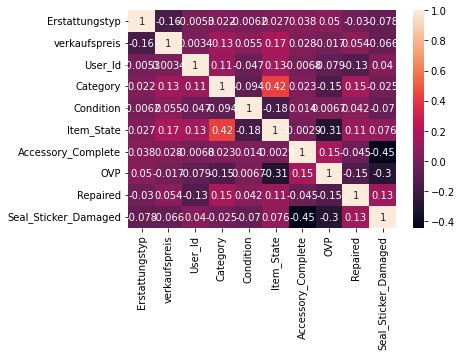

In [152]:
df_corr = refunds[["Erstattungstyp", "verkaufspreis", "User_Id", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Seal_Sticker_Damaged"]]

label_encoder_category = preprocessing.LabelEncoder()
df_corr["Category"] = label_encoder_category.fit_transform(refunds["Category"])

label_encoder_condition = preprocessing.LabelEncoder()
df_corr["Condition"] = label_encoder_category.fit_transform(refunds["Condition"])

label_encoder_state = preprocessing.LabelEncoder()
df_corr["Item_State"] = label_encoder_state.fit_transform(refunds["Item_State"])

label_encoder_repaird = preprocessing.LabelEncoder()
df_corr["Repaired"] = label_encoder_repaird.fit_transform(refunds["Repaired"])

label_encoder_y = preprocessing.LabelEncoder()
df_corr["Erstattungstyp"] = label_encoder_y.fit_transform(refunds["Erstattungstyp"])

df_corr["verkaufspreis"] = np.sqrt(df_corr["verkaufspreis"]**2)

corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Preprocessing

In [169]:
X = refunds[["verkaufspreis", "User_Id", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Seal_Sticker_Damaged"]]
y = refunds["Erstattungstyp"]

# Drop values with Erstattungstyp = "Ersatz"
all_pos = all_pos[all_pos["Erstattungstyp"] != "Ersatz"]

# Replace the values which are not Verkauf with Erstattung
labels = all_pos["Erstattungstyp"].unique()
# Drop Verkauf from labels
labels = labels[labels != "Verkauf"]
# Replace values in y with labels
all_pos["Erstattungstyp"] = all_pos["Erstattungstyp"].replace(labels, "Erstattung")
all_pos = all_pos.reset_index(drop=True)

X_all = all_pos[["verkaufspreis", "User_Id", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Seal_Sticker_Damaged"]]
y_all = all_pos["Erstattungstyp"]



# Transformation des Verkaufspreises, sodass immer positive Werte angezeigt werden
X["verkaufspreis"] = np.sqrt(X["verkaufspreis"]**2)
X_all["verkaufspreis"] = np.sqrt(X_all["verkaufspreis"]**2)

C:\Users\Daniel\AppData\Local\Temp/ipykernel_6056/2648225209.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["verkaufspreis"] = np.sqrt(X["verkaufspreis"]**2)
C:\Users\Daniel\AppData\Local\Temp/ipykernel_6056/2648225209.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all["verkaufspreis"] = np.sqrt(X_all["verkaufspreis"]**2)


In [182]:
label_encoder_category = preprocessing.LabelEncoder()
X["Category"] = label_encoder_category.fit_transform(X["Category"])

label_encoder_condition = preprocessing.LabelEncoder()
X["Condition"] = label_encoder_category.fit_transform(X["Condition"])

label_encoder_state = preprocessing.LabelEncoder()
X["Item_State"] = label_encoder_state.fit_transform(X["Item_State"])

label_encoder_repaired = preprocessing.LabelEncoder()
X["Repaired"] = label_encoder_repaired.fit_transform(X["Repaired"])

label_encoder_category_all = preprocessing.LabelEncoder()
X_all["Category"] = label_encoder_category_all.fit_transform(X_all["Category"])

label_encoder_condition_all  = preprocessing.LabelEncoder()
X_all["Condition"] = label_encoder_condition_all.fit_transform(X_all["Condition"])

label_encoder_state_all  = preprocessing.LabelEncoder()
X_all["Item_State"] = label_encoder_state_all.fit_transform(X_all["Item_State"])

label_encoder_repaired_all  = preprocessing.LabelEncoder()
X_all["Repaired"] = label_encoder_repaired_all.fit_transform(X_all["Repaired"])

C:\Users\Daniel\AppData\Local\Temp/ipykernel_6056/4255427130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Category"] = label_encoder_category.fit_transform(X["Category"])
C:\Users\Daniel\AppData\Local\Temp/ipykernel_6056/4255427130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Condition"] = label_encoder_category.fit_transform(X["Condition"])
C:\Users\Daniel\AppData\Local\Temp/ipykernel_6056/4255427130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.33, random_state=1)


# Model testing

In [157]:
# Standard tree with fixed hyperparameters
clf_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf=20, random_state=1)
clf_tree = clf_tree.fit(X_all_train, y_all_train)
print(clf_tree.score(X_all_test, y_all_test))

0.8941797129252167


In [158]:
def tuneTreeAndTestWithTestData(X_train, y_train, X_test, y_test):
    clf_tree = tree.DecisionTreeClassifier(random_state=1)
    param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
    grid_search = GridSearchCV(clf_tree, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.score(X_test, y_test))
    return grid_search.best_estimator_

tuneTreeAndTestWithTestData(X_all_train, y_all_train, X_all_test, y_all_test)

{'max_depth': 19, 'min_samples_leaf': 30}
0.9045489751814874
0.9051248672536055


DecisionTreeClassifier(max_depth=19, min_samples_leaf=30, random_state=1)

In [159]:
# Tuned Tree
clf_tuned_tree = tree.DecisionTreeClassifier(max_depth=12, min_samples_leaf=80, random_state=1)
clf_tuned_tree = clf_tuned_tree.fit(X_all_train, y_all_train)
print(clf_tuned_tree.score(X_all_test, y_all_test))

0.9027953821383303


In [160]:
clf_forest = ensemble.RandomForestClassifier(max_depth = 21, min_samples_leaf=20, random_state=1)
clf_forest = clf_forest.fit(X_train, y_train)
print(clf_forest.score(X_test, y_test))

0.8296296296296296


In [161]:
clf_knn = neighbors.KNeighborsClassifier()
clf_knn = clf_knn.fit(X_train, y_train)
print(clf_knn.score(X_test, y_test))

0.7661835748792271


In [162]:
clf_svm = svm.SVC(random_state=1)
clf_svm = clf_svm.fit(X_train, y_train)
print(clf_svm.score(X_test, y_test))

0.7473429951690821


In [163]:
clf_forest_all = ensemble.RandomForestClassifier(max_depth = 21, min_samples_leaf=20, random_state=1)
clf_forest_all = clf_forest_all.fit(X_all_train, y_all_train)
print(clf_forest_all.score(X_all_test, y_all_test))

0.8984789832482615


In [164]:
clf_forest_all_auc = metrics.roc_auc_score(y_all_test, clf_forest_all.predict_proba(X_all_test), multi_class="ovr")
clf_forest_auc = metrics.roc_auc_score(y_test, clf_forest.predict_proba(X_test), multi_class="ovr")

print(clf_forest_all_auc)
print(clf_forest_auc)

ValueError: y should be a 1d array, got an array of shape (58382, 2) instead.

# Export models

In [ ]:
def exportTree(clf, feature_names, fname):
    class_names=clf.classes_
    fig = plt.figure(figsize=(60,50))
    _ = tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
    fig.savefig(fname)

In [ ]:
dotfile = open("tree.dot", 'w')
tree.export_graphviz(clf_tuned_tree, out_file=dotfile, feature_names=X_all_train.columns, class_names=clf_tuned_tree.classes_, filled=True, rounded=True)
dotfile.close()

In [165]:
# Predict a single sample from a dataframe
def predictProbabilityFromOneSampleOfDataframe(model, X, loc):
    prediction =  model.predict_proba(X.iloc[loc].values.reshape(1,-1))
    return prediction[0][0]

predictProbabilityFromOneSampleOfDataframe(clf_tuned_tree, X_test, 1)

0.1228177786165896

In [175]:
print(X_all_test.iloc[177962])

IndexError: single positional indexer is out-of-bounds

In [185]:
# Predict a single sample from a dataframe
def predictProbabilityFromOneSampleOfOriginalDataframe(model, X, loc):
    X = X[["verkaufspreis", "User_Id", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Seal_Sticker_Damaged"]]
    X["verkaufspreis"] = np.sqrt(X["verkaufspreis"]**2)
    
    label_encoder_category_all = preprocessing.LabelEncoder()
    X["Category"] = label_encoder_category_all.fit_transform(X["Category"])

    label_encoder_condition_all  = preprocessing.LabelEncoder()
    X["Condition"] = label_encoder_condition_all.fit_transform(X["Condition"])

    label_encoder_state_all  = preprocessing.LabelEncoder()
    X["Item_State"] = label_encoder_state_all.fit_transform(X["Item_State"])

    label_encoder_repaired_all  = preprocessing.LabelEncoder()
    X["Repaired"] = label_encoder_repaired_all.fit_transform(X["Repaired"])
    
    prediction =  model.predict_proba(X.iloc[loc].values.reshape(1,-1))
    return prediction[0][0]

In [186]:
predictProbabilityFromOneSampleOfDataframe(clf_tuned_tree, all_pos, 133728)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [176]:
print(all_pos[all_pos["Erstattungstyp"] == "Erstattung"].index)

Int64Index([133728, 133729, 133730, 133731, 133732, 133733, 133734, 133735,
            133736, 133737,
            ...
            176896, 176897, 176898, 176899, 176900, 176901, 176902, 176903,
            176909, 176913],
           dtype='int64', length=18726)
